In [2]:
import sys
sys.path.insert(0, '../slowdaq')
from load_slowdaq import load_slow
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
slowdir1 = '/data/pb2/ChileData/slowdaq/22300000/20210305/'
slowdir2 = '/data/pb2/ChileData/slowdaq/22300000/20210306/'

In [4]:
files1 = sorted(glob(slowdir1+'*808*'))
files2 = sorted(glob(slowdir2+'*808*'))
files = np.concatenate((files1, files2))
files

array(['/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_205230_Run22300808_000.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_205235_Run22300808_001.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_205703_Run22300808_002.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_212702_Run22300808_003.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_215938_Run22300808_004.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_222937_Run22300808_005.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_230233_Run22300808_006.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_233238_Run22300808_007.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210306/slowdaq_20210306_000418_Run22300808_008.log.gz',
       '/data/pb2/ChileData/slowdaq/22300000/20210306/slowdaq_20210306_00

In [6]:
data = load_slow(files = files, sources=['Lakeshore151'])

Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_205230_Run22300808_000.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_205235_Run22300808_001.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_205703_Run22300808_002.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_212702_Run22300808_003.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_215938_Run22300808_004.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_222937_Run22300808_005.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_230233_Run22300808_006.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210305/slowdaq_20210305_233238_Run22300808_007.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210306/slowdaq_20210306_000418_Run22300808_008.log.gz
Loading /data/pb2/ChileData/slowdaq/22300000/20210306/slowdaq_20210306_003422_Run22300808_0

In [7]:
ls = data['Lakeshore151']
time = np.array(ls['time']) - ls['time'][0]
key = 'MODEL370_370A4A_T'
#l = len(ls[key][0])
tmp = np.array(ls[key])[:,12]

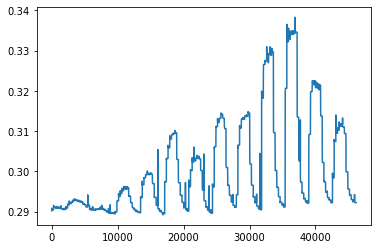

In [8]:
plt.plot(time, tmp)

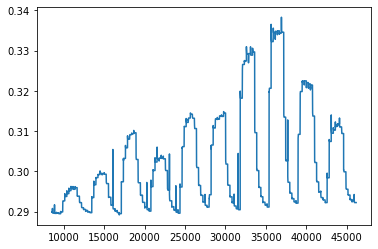

In [14]:
#fig = plt.figure(figsize=(20,10))

# for i in range(l):
#     tmp = np.array(ls[key])[:,i]

#     plt.plot(time, tmp, label=i)
s = 1500
e = 10000
plt.plot(time[s:e], tmp[s:e])
#plt.plot(x, tmp_interp)
#plt.plot(x[rise], tmp_interp[rise], 'x')

In [15]:
time = time[s:e]
tmp = tmp[s:e]

x = np.linspace(time[0], time[-1], 150)
tmp_interp = np.interp(x, time, tmp)

In [16]:
rise = np.where(np.diff(tmp_interp)>1e-3)[0]
rise

array([  5,   6,  19,  20,  21,  34,  35,  36,  37,  38,  48,  49,  50,
        62,  63,  64,  65,  66,  77,  78,  79,  80,  92,  93,  95, 106,
       107, 108, 120, 121, 122, 134, 135, 136])

In [17]:
a = np.where(np.diff(rise)<10)[0]+1
a

array([ 1,  3,  4,  6,  7,  8,  9, 11, 12, 14, 15, 16, 17, 19, 20, 21, 23,
       24, 26, 27, 29, 30, 32, 33])

In [18]:
start_indices = np.delete(rise, a)
start_indices

array([  5,  19,  34,  48,  62,  77,  92, 106, 120, 134])

In [21]:
conv = len(tmp_interp)/(x[-1] - x[0])
end_indices = np.ceil(start_indices + 25*60*conv).astype(dtype=np.int)
end_indices

array([ 11,  25,  40,  54,  68,  83,  98, 112, 126, 140])

In [23]:
#end_indices = np.array([  5,  18,  31,  45,  58,  71,  84,  97, 111, 124, 137])

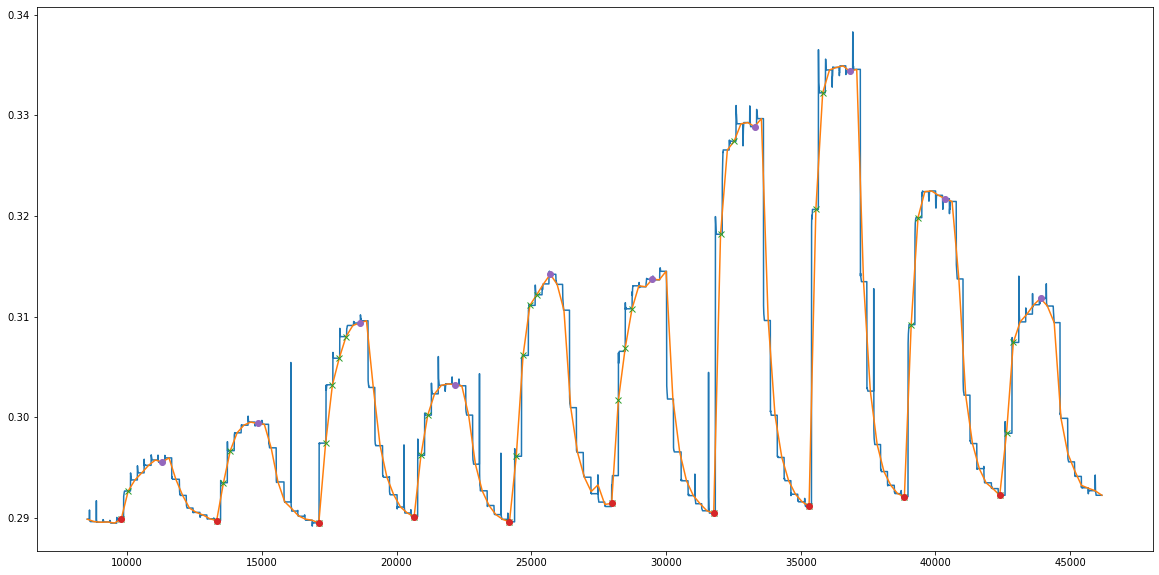

In [24]:
plt.figure(figsize=(20,10))
plt.plot(time, tmp)
plt.plot(x, tmp_interp)
plt.plot(x[rise], tmp_interp[rise], 'x')
plt.plot(x[start_indices], tmp_interp[start_indices], 'o')
plt.plot(x[end_indices], tmp_interp[end_indices], 'o')

In [25]:
heating = tmp_interp[end_indices]-tmp_interp[start_indices] 
heating *= 1000
heating

array([ 5.63191989,  9.64482495, 19.86894793, 13.11693763, 24.60898884,
       22.2947498 , 38.41711538, 43.24333736, 29.6164708 , 19.57109264])

In [28]:
az_v = np.array([0.65, 0.70, 0.75, 0.8, 0.95, 1.00, 1.05, 1.10, 1.15, 1.20])

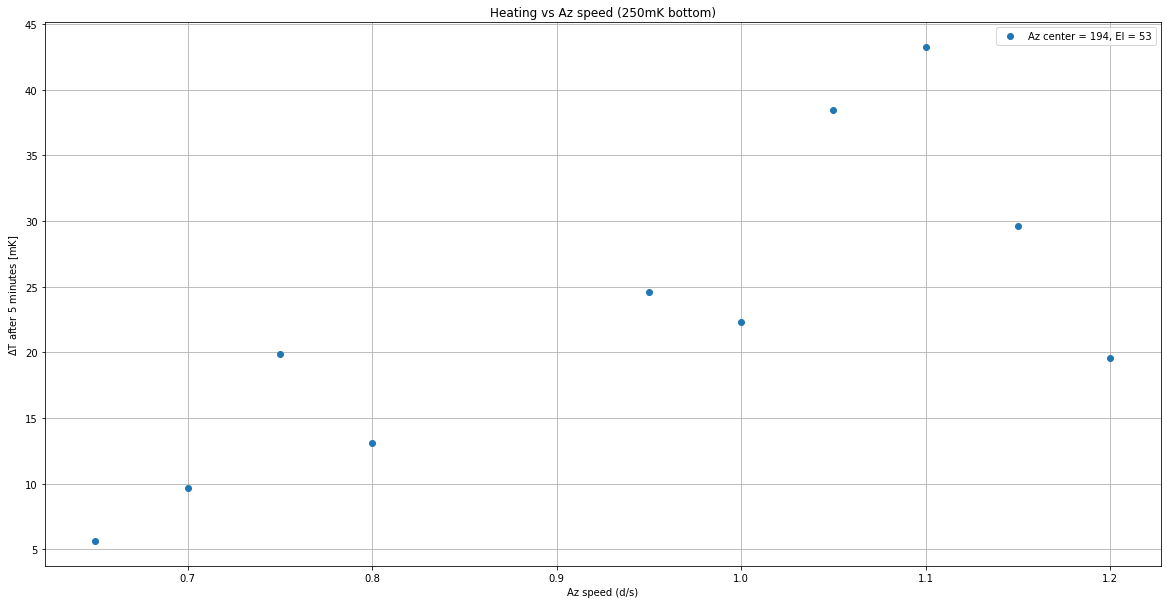

In [27]:
plt.figure(figsize=(20,10))
plt.plot(az_v, heating, 'o', label='Az center = 194, El = 53')
plt.title('Heating vs Az speed (250mK bottom)')
plt.ylabel('$\Delta$T after 5 minutes [mK]')
plt.xlabel('Az speed (d/s)')
plt.legend()
plt.grid()